<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

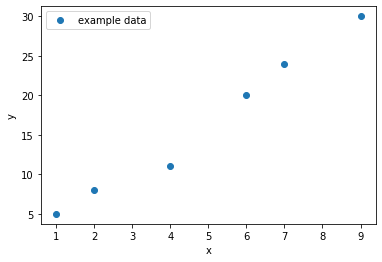

In [2]:
import matplotlib.pyplot as plt
ex_xs = [[2],[4],[7],[1],[9],[6]] # 독립변수 6개
ex_ys = [8,11,24,5,30,20] # 종속변수 6개

plt.plot(ex_xs[:],ex_ys,'o',label ="example data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

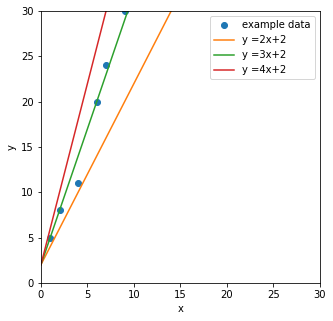

In [4]:
plt.figure(figsize=(5,5))
plt.plot(ex_xs[:],ex_ys,'o',label ="example data")
plt.plot([0,30],[0*2+2,30*2+2], label ="y =2x+2")
plt.plot([0,30],[0*3+2,30*3+2], label ="y =3x+2")
plt.plot([0,30],[0*4+2,30*4+2], label ="y =4x+2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [5]:
import numpy as np

In [7]:
def mse(yp,y): #yp:예측값, y: 실제값
  """
  (예측값-실제값)의 제곱의 평균을 구하는 손실함수
  """
  return np.mean(sum(yp-y)**2)

In [10]:
b=2 # 편향은 2라고 가정
mses =[]
wpl = np.arange(-10,10,0.5) #가중치를 -10~10까지 0.5씩 증가하면서 확인해 보자.
for wp in wpl:
  yp = wp*np.array(ex_xs)+b #예측값
  mses.append(mse(yp,ex_ys)) #mse를 구하여 mses에 보관

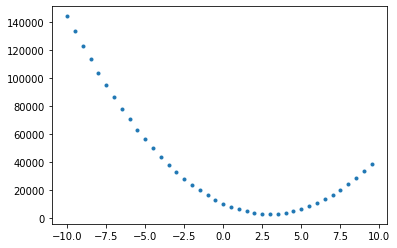

In [12]:
mi = np.array(mses).argmin() #최소값이 있는 인덱스
plt.plot(wpl,mses,'.')
plt.show()

In [17]:
w=3 # 가중치를 3라고 가정
mses2 =[]
bpl = np.arange(-10,10,0.5) #가중치를 -10~10까지 0.5씩 증가하면서 확인해 보자.
for bp in bpl:
  yp = w*np.array(ex_xs)+bp #예측값
  mses2.append(mse(yp,ex_ys)) #mse를 구하여 mses에 보관

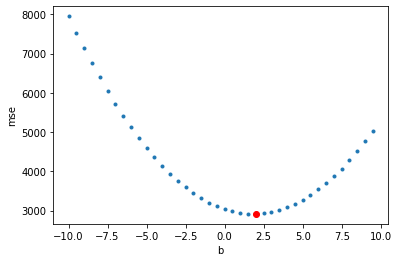

2.0


In [18]:
mi2 = np.array(mses2).argmin() #최소값이 있는 인덱스
plt.plot(bpl,mses2,'.')
plt.plot(bpl[mi2],mses2[mi2],'or') #최솟값
plt.xlabel('b')
plt.ylabel('mse')
plt.show()
print(bpl[mi2])

dmse/dw = 2mean(y-(wx+b))x

dmse/dw = 2mean(y-(wx+b))

In [20]:
def gradient(y,x,w,b):
  yp = w*x+b
  error = y-yp
  wd = - (2*sum(error*x)/len(x))
  bd = - (2*sum(error)/len(x))
  return wd,bd

In [47]:
def gradient_descent(x,y,lr=0.0001,epochs=1000):
  """
  경사하강법 함수
  입력 매개변수:x,y,lr,epochs
    x:독립변수
    y:종속변수
    lr:경사를 이동시킬 때 사용할 비율(lr*경사만큼 이동)
    epochs: 학습 횟수
  """
  if isinstance(x,list):#x가 list일 때
    x = np.array(x).reshape(-1) #1차원 numpy 배열로 변화
  wbhl =[] #학습 과정을 기록할 컬렉션

  wp = np.random.uniform(-1,1) #가중치 초기값을 -1~1사이의 랜덤 값으로 지정
  bp = np.random.uniform(-1,1) #편향 초기값을 -1~1 사이의 랜덤 값으로 지정
  amse = 0 #경사를 조절한 후에 mse를 기억할 변수를 0으로 초기화
  for epoch in range(epochs): #epochs 횟수만큼 학습시킨다.
    bmse = amse #이전 mse로 설정
    wd,bd = gradient(y,x,wp,bp) #경사를 구함(여기에서는 경사에 -부호를 취한 값)
    yp = wp*x + bp #예측
    amse = mse(yp,y) #새로 계산한 mse값
    wp = wp - (wd*lr) #가중치를 조절
    bp = bp - (bd*lr) #편향을 조절
    wbhl.append([wp,bp])#히스토리에 가중치와 편향을 보관
    if np.abs(bmse-amse)<0.00001:   #이전 mse와 이후 mse의 차이가 정해준 값보다 작다면
      break #더 이상 학습하지 말고 반복문 탈출하라
  return wp,bp,wbhl #가중치, 편향, 히스토리 반환


In [23]:
wp,bp,wbhl = gradient_descent(ex_xs,ex_ys)
for epoch,  (ewp,ebp) in enumerate(wbhl):
  print(f'epoch:{epoch} w:{ewp} b:{ebp}')

epoch:0 w:-0.6467659382733533 b:0.9196902815516721
epoch:1 w:-0.40767453417598043 b:0.9567696383918778
epoch:2 w:-0.18384492805013247 b:0.9914636196121285
epoch:3 w:0.025697257475408575 b:1.0239245266773889
epoch:4 w:0.22186419133489335 b:1.0542949374684385
epoch:5 w:0.40550980567949013 b:1.0827083270772644
epoch:6 w:0.5774335139637217 b:1.109289648968208
epoch:7 w:0.7383836916532903 b:1.134155879035289
epoch:8 w:0.8890609347095608 b:1.15741652492457
epoch:9 w:1.030121110038394 b:1.179174102839195
epoch:10 w:1.162178211185222 b:1.1995245839031456
epoch:11 w:1.2858070317102794 b:1.2185578120272156
epoch:12 w:1.4015456678840756 b:1.2363578950966285
epoch:13 w:1.5098978616000343 b:1.2530035711835559
epoch:14 w:1.6113351937055245 b:1.268568551379055
epoch:15 w:1.706299137301216 b:1.2831218407371434
epoch:16 w:1.795202979948981 b:1.2967280387284241
epoch:17 w:1.8784336231577865 b:1.3094476205114605
epoch:18 w:1.9563532669826738 b:1.3213372002465789
epoch:19 w:2.0293009870717036 b:1.33244977

In [26]:
xs = np.array(ex_xs)
xs = xs[:,0]
ys = np.array(ex_ys)

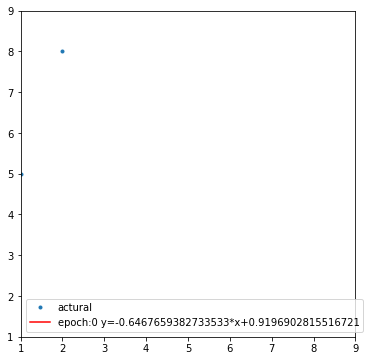

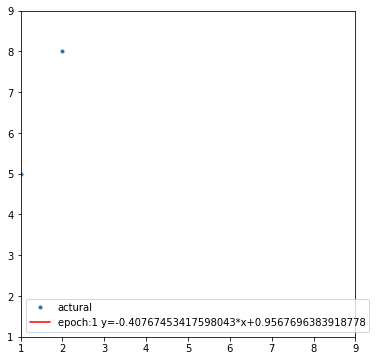

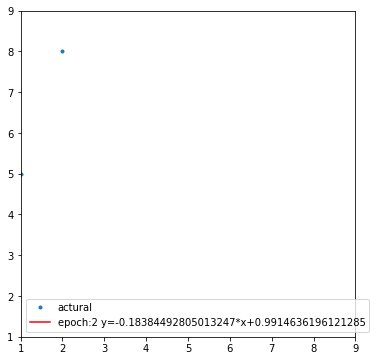

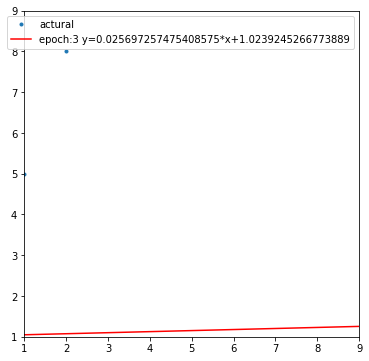

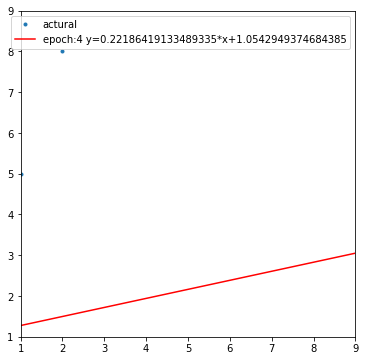

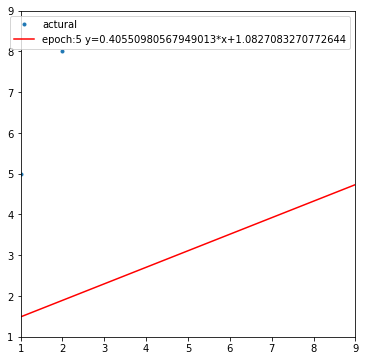

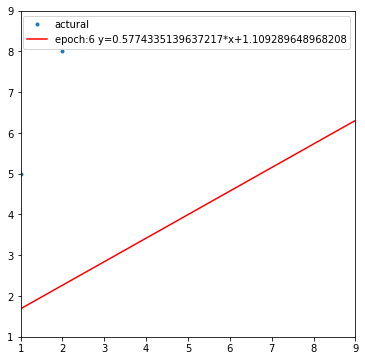

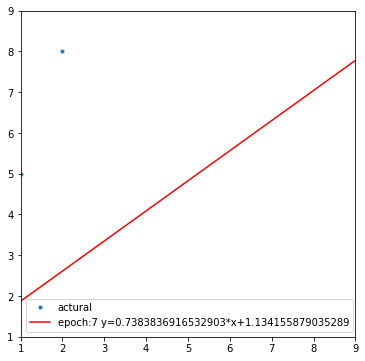

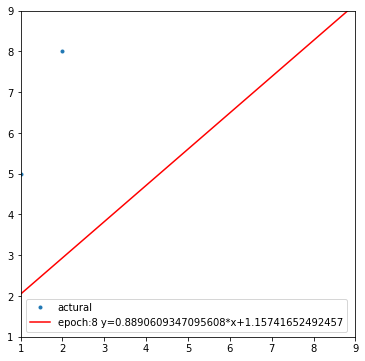

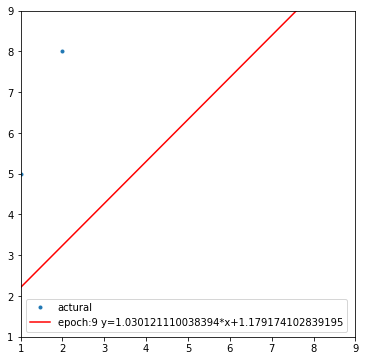

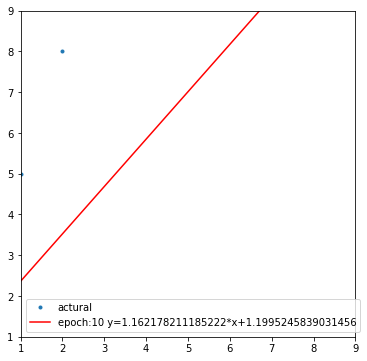

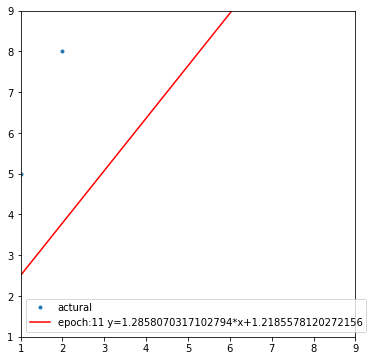

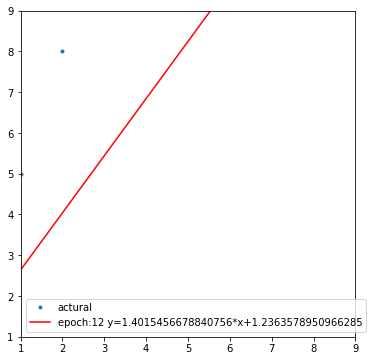

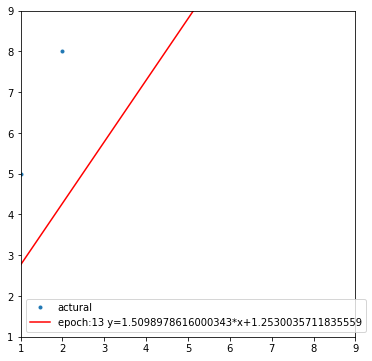

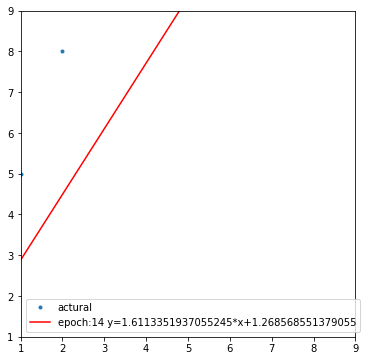

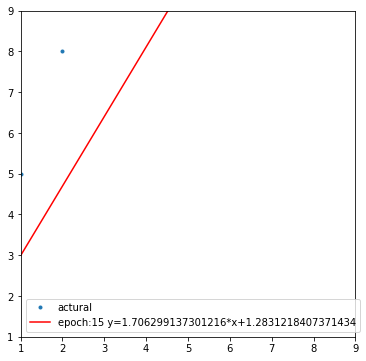

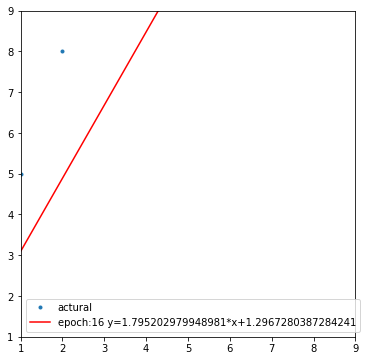

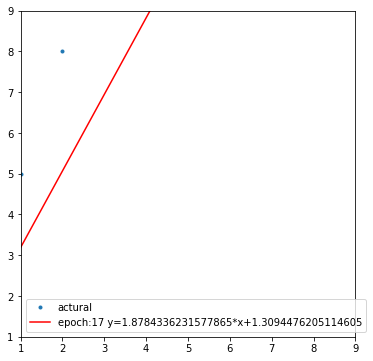

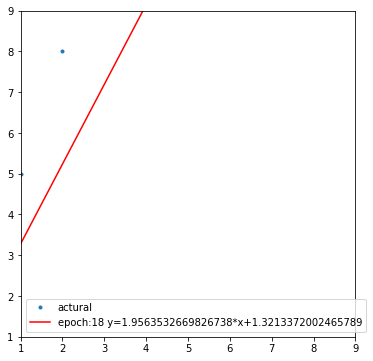

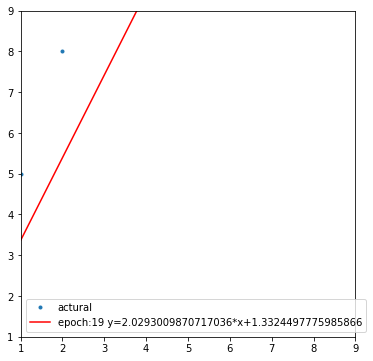

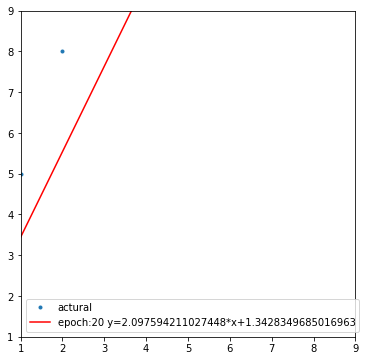

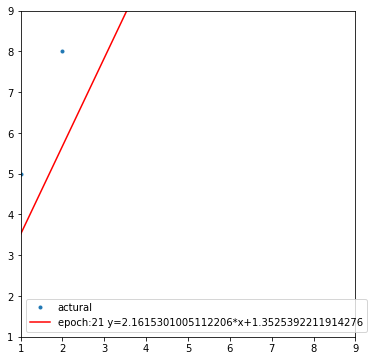

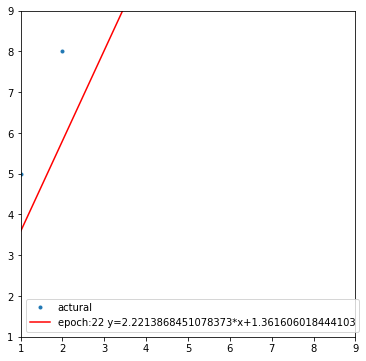

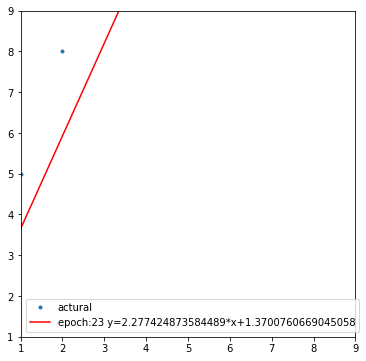

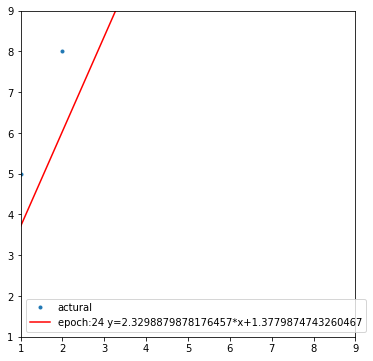

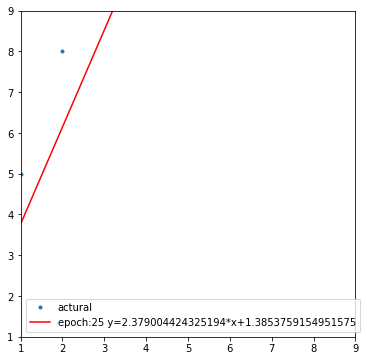

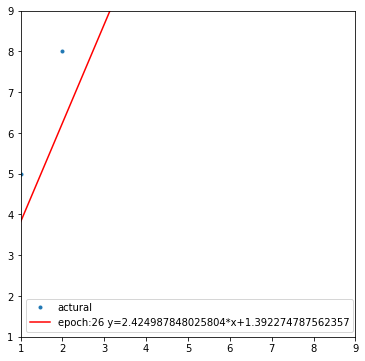

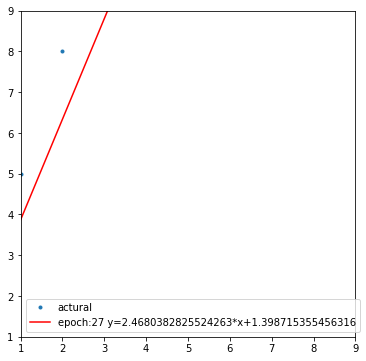

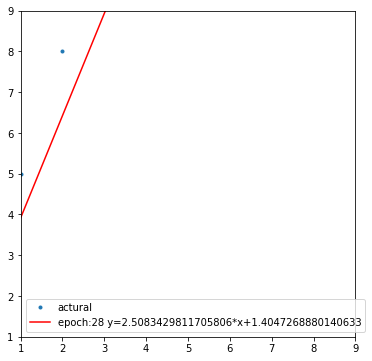

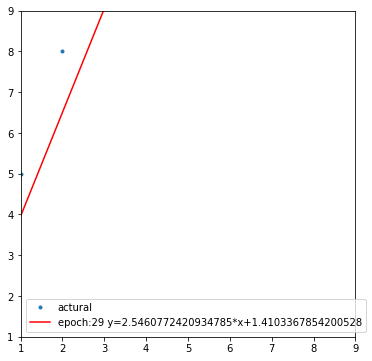

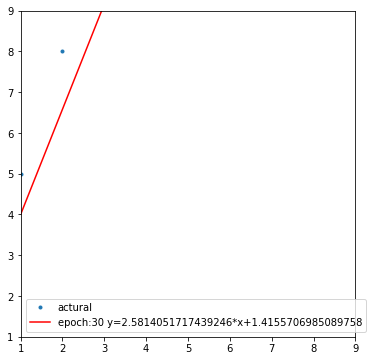

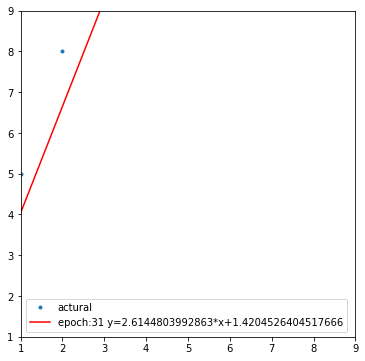

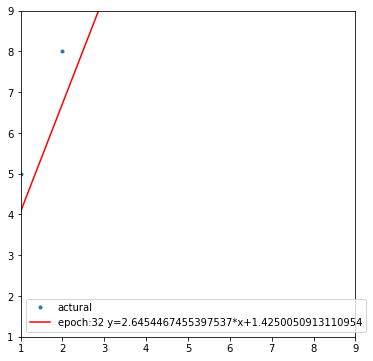

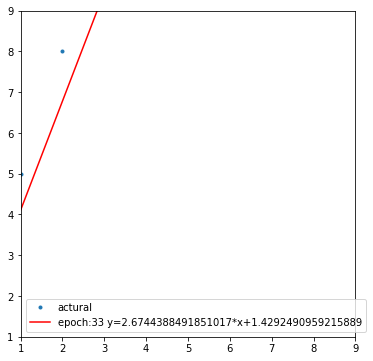

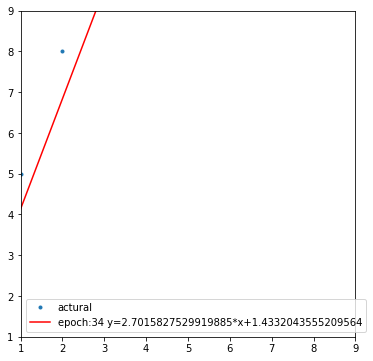

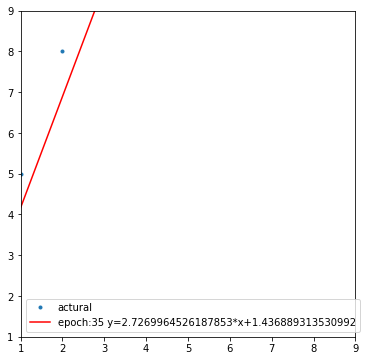

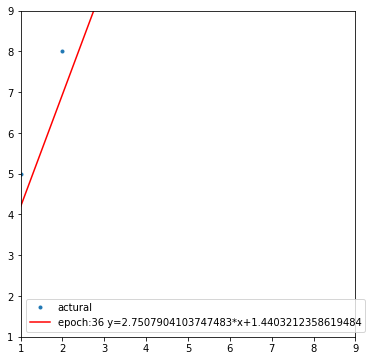

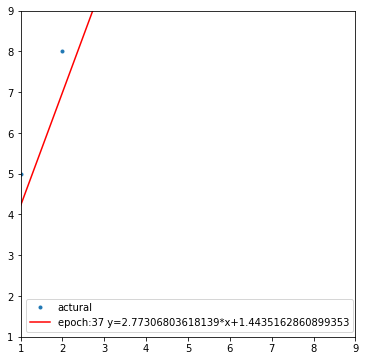

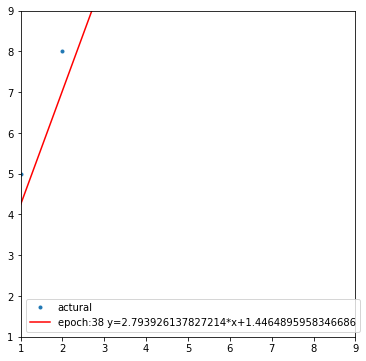

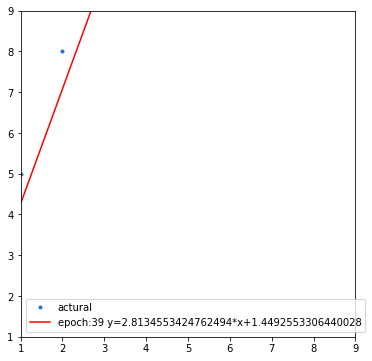

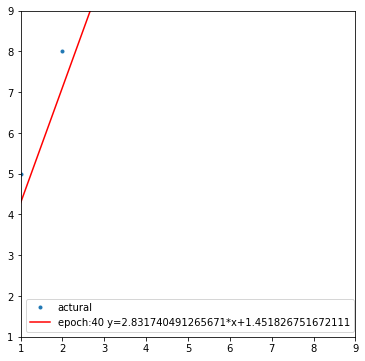

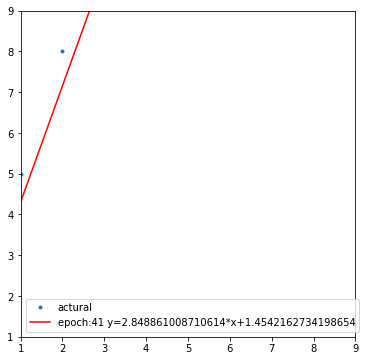

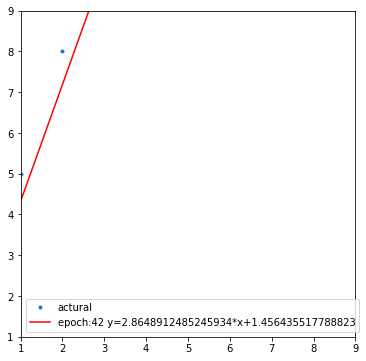

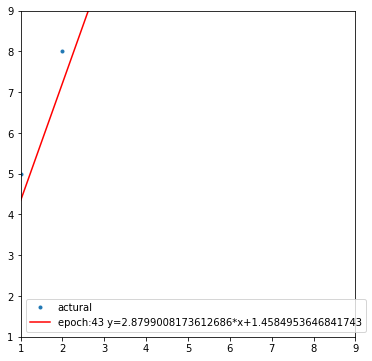

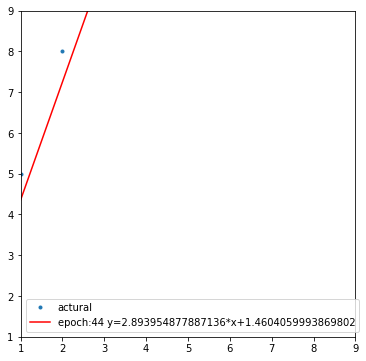

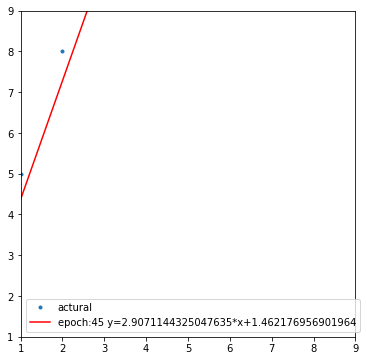

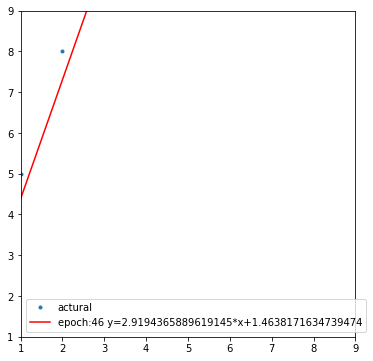

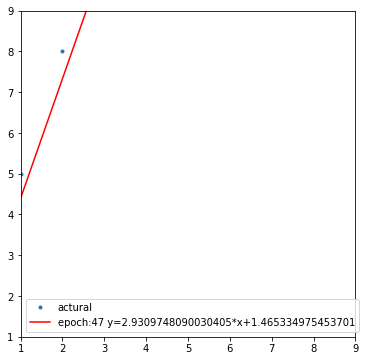

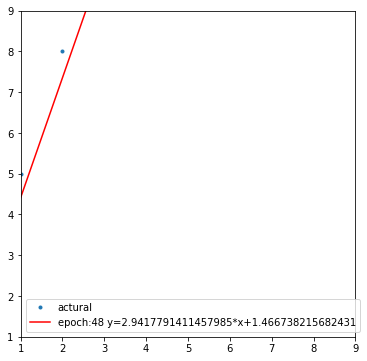

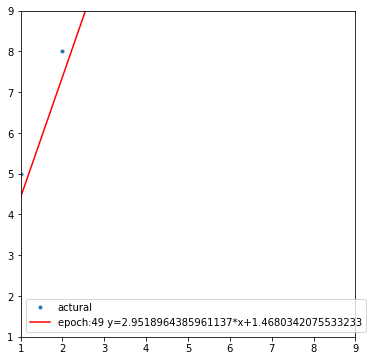

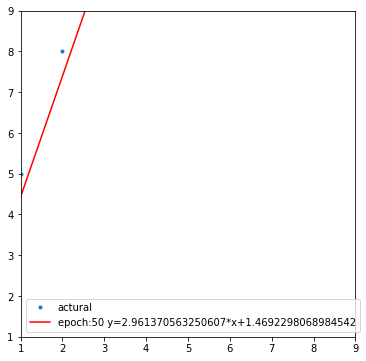

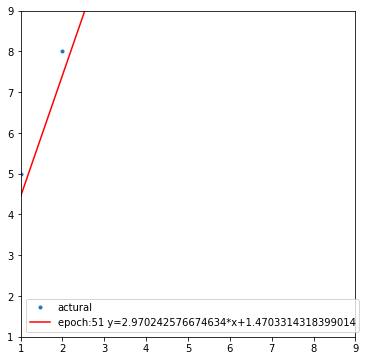

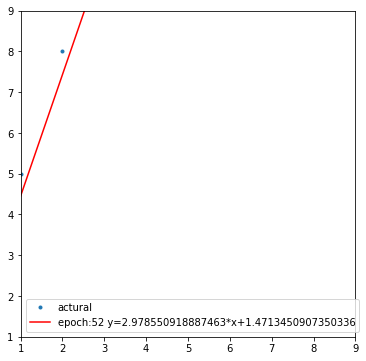

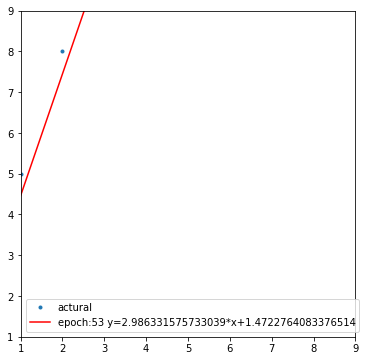

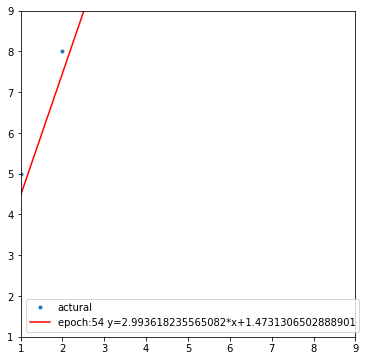

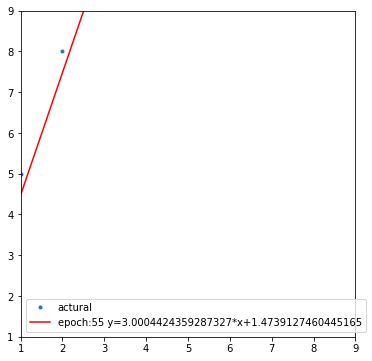

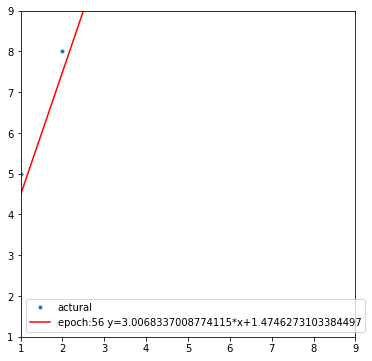

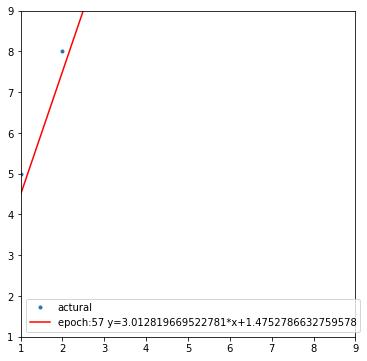

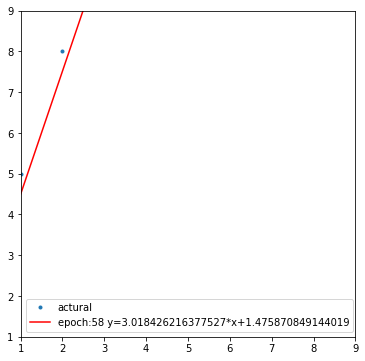

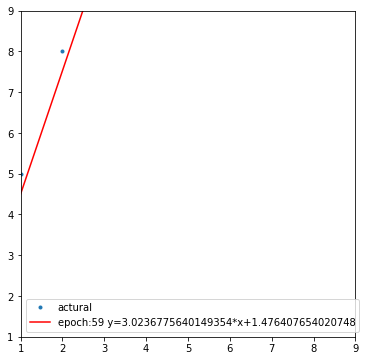

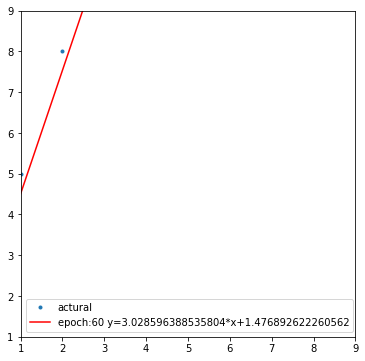

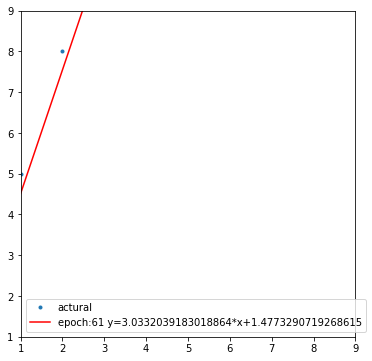

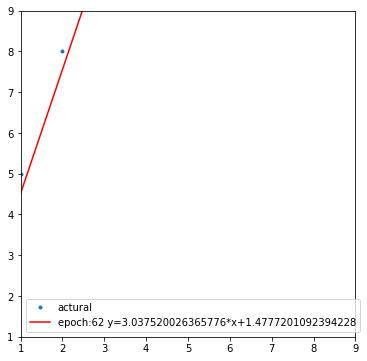

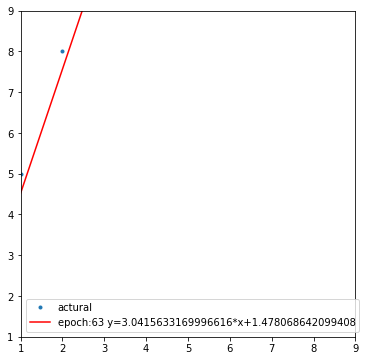

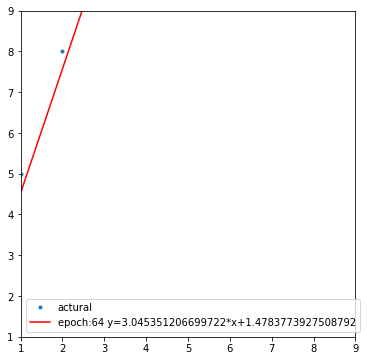

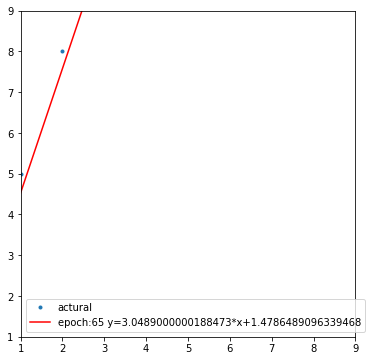

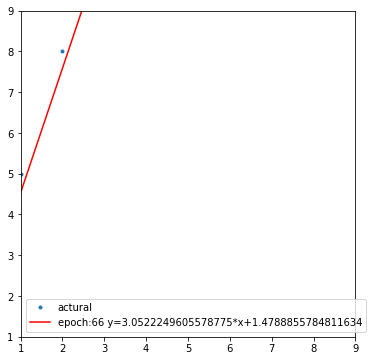

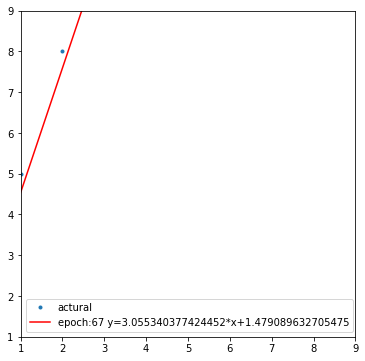

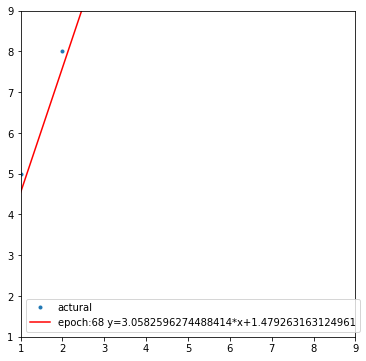

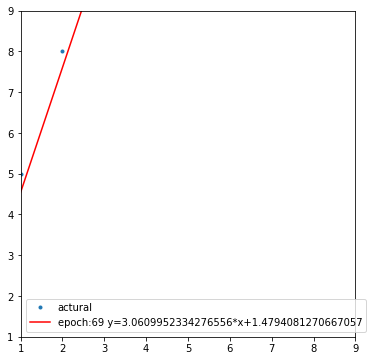

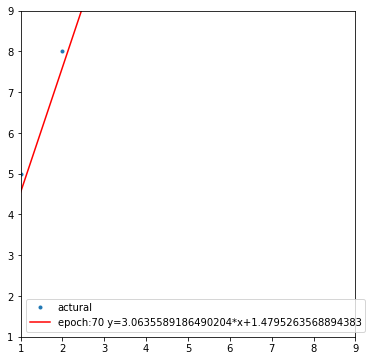

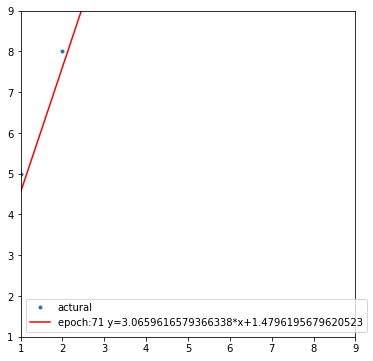

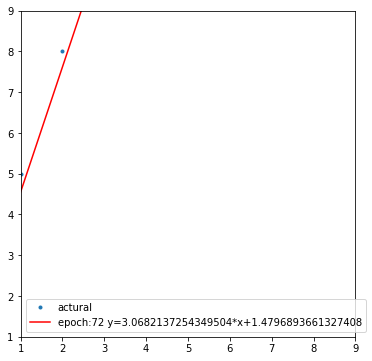

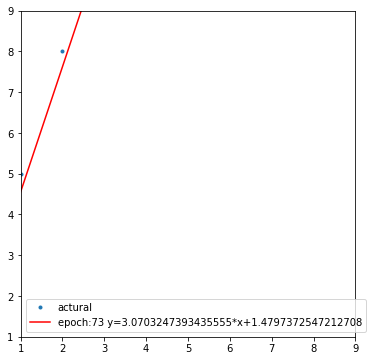

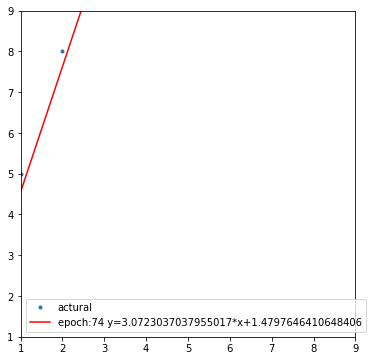

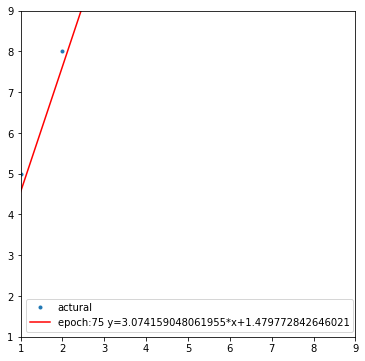

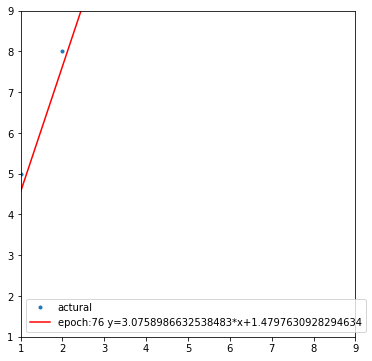

In [29]:
min_val = min(min(xs), min(ys))
max_val = max(max(xs), min(ys))
for epoch,wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]

  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs,ys,'.',label = 'actural')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color = 'black')
  plt.axhline(y=0,color = 'black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

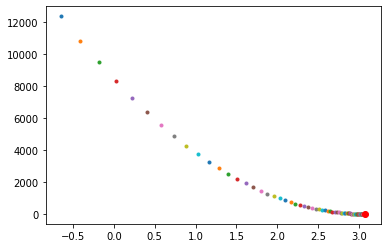

In [36]:
min_index = -1 #최솟값이 있는 인덱스
min_mse = np.inf # mse최솟값을 무한대로 초기화
for epoch,(wp,bp) in enumerate(wbhl):
  yp = wp*xs+bp
  mse_val = mse(yp,ys)
  if min_mse > mse_val: # 새로운 값이 더 작다면
    min_mse = mse_val #작은 값으로 설정
    min_index = epoch #최소값이 있는 인덱스를 현재 인덱스로 설정
  plt.plot(wp,mse_val,'.')
plt.plot(wbhl[min_index][0],mse_val,'ro')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
lr_model = LinearRegression() #모델생성
lr_model.fit(ex_xs,ex_ys) #학습
print(f'w:{lr_model.coef_} b:{lr_model.intercept_}')

w:[3.1886121] b:0.9217081850533795


In [35]:
pv = lr_model.predict([[12],[30],[50]]) #예측해 주세요.
print(pv)

[ 39.18505338  96.58007117 160.35231317]


In [37]:
from sklearn import datasets

In [ ]:
iris_data = datasets.load_iris()
iris_data

In [46]:
xs = ([[x] for x in iris_data.data[:,0]])
ys= ([y for y in iris_data.data[:,1]])

In [45]:
wp,bp,wbhl = gradient_descent(xs,ys)
for epoch, (ewp,ebp) in enumerate(wbhl):
  print(f'epoch: {epoch} w:{ewp} b:{ebp}')

epoch: 0 w:-0.30647977549708166 b:-0.6309756065713599
epoch: 1 w:-0.24211331557187865 b:-0.6200172617152413
epoch: 2 w:-0.1823581319259644 b:-0.6098330629104941
epoch: 3 w:-0.12688399583126445 b:-0.6003675714162316
epoch: 4 w:-0.07538432732500472 b:-0.5915693186421178
epoch: 5 w:-0.027574501643850842 b:-0.5833905218328287
epoch: 6 w:0.016809723060131884 b:-0.5757868201132852
epoch: 7 w:0.05801366540708687 b:-0.5687170294365547
epoch: 8 w:0.09626507594394461 b:-0.562142915080739
epoch: 9 w:0.1317753952519245 b:-0.5560289804381091
epoch: 10 w:0.164740921956821 b:-0.5503422709297437
epoch: 11 w:0.1953438970942314 b:-0.5450521919624863
epoch: 12 w:0.22375351081982364 b:-0.5401303399226026
epoch: 13 w:0.25012683702577065 b:-0.5355503452725384
epoch: 14 w:0.27460970102622806 b:-0.5312877268840345
epoch: 15 w:0.2973374851050013 b:-0.5273197568029263
epoch: 16 w:0.3184358763752947 b:-0.5236253346985809
epoch: 17 w:0.3380215610827643 b:-0.5201848713044229
epoch: 18 w:0.35620286918724603 b:-0.51

In [50]:
xs2 = np.array(xs)
xs2 = xs2[:,0]
ys2 = np.array(ys)
print(xs2.shape, ys2.shape)

(150,) (150,)


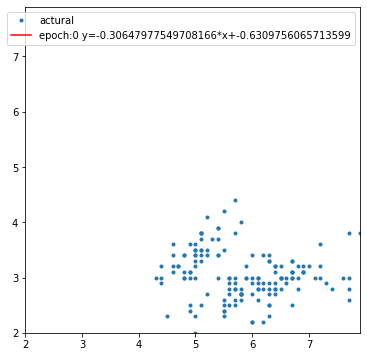

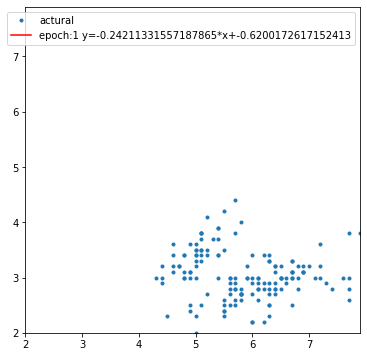

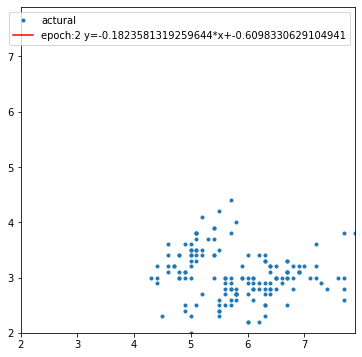

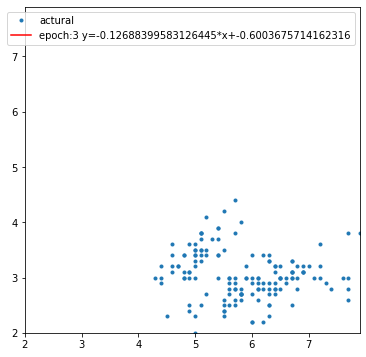

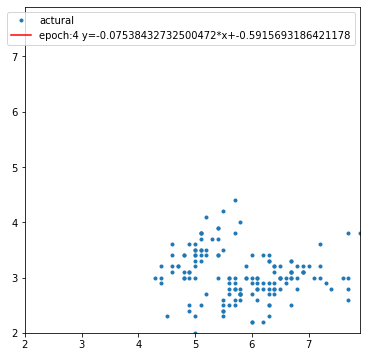

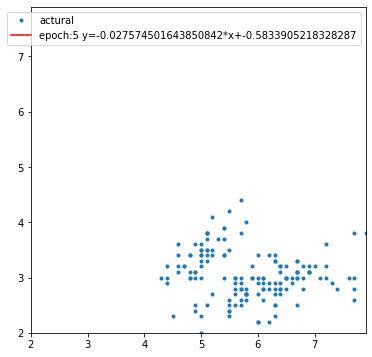

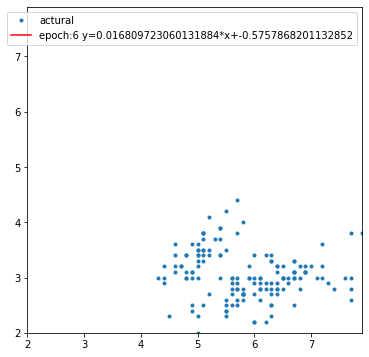

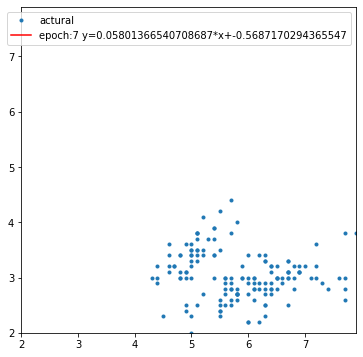

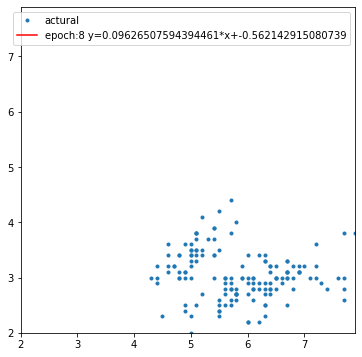

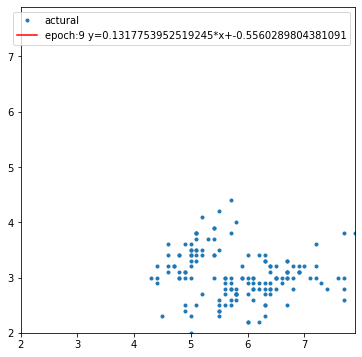

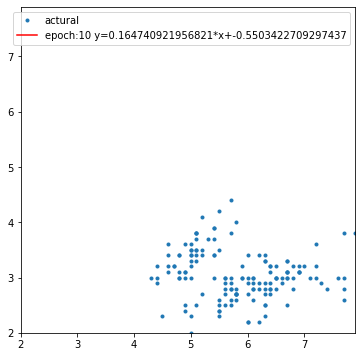

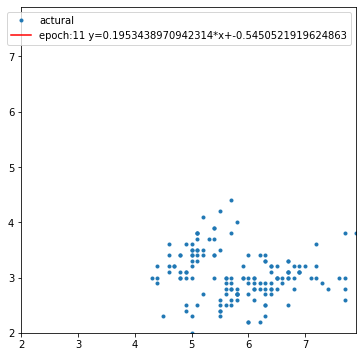

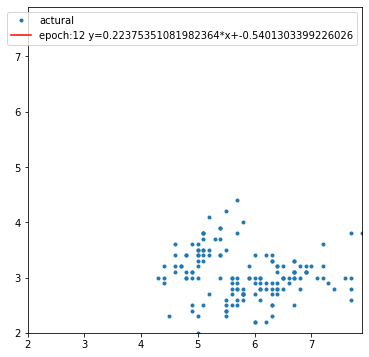

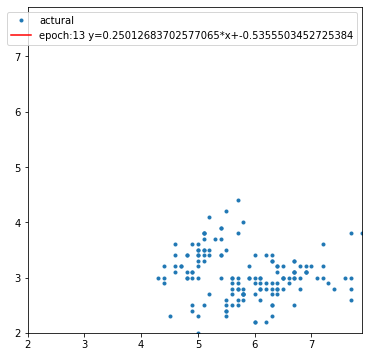

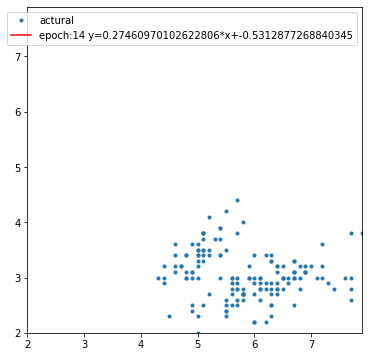

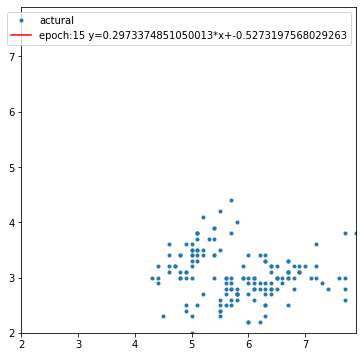

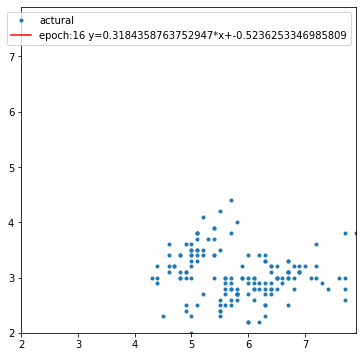

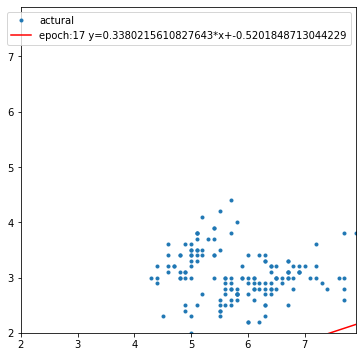

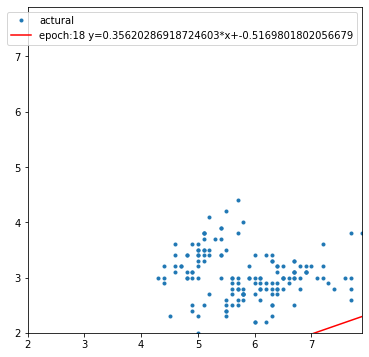

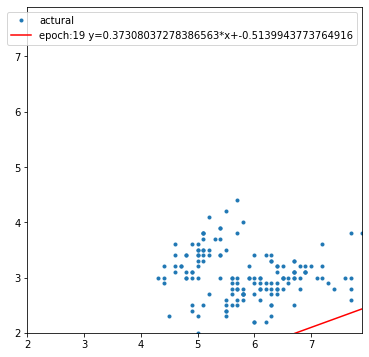

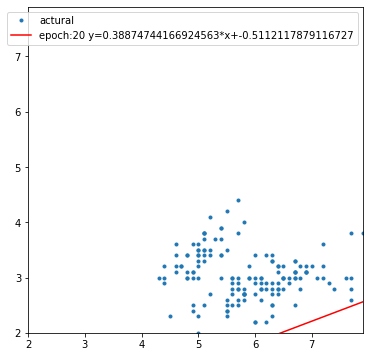

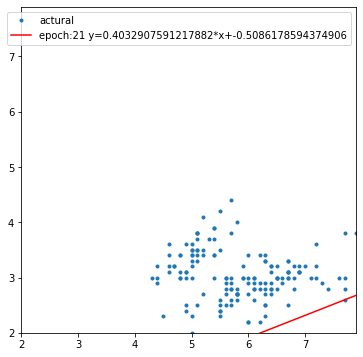

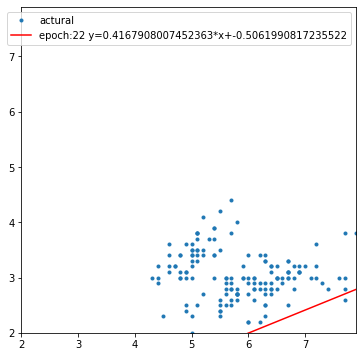

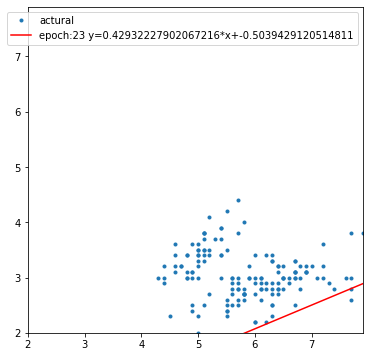

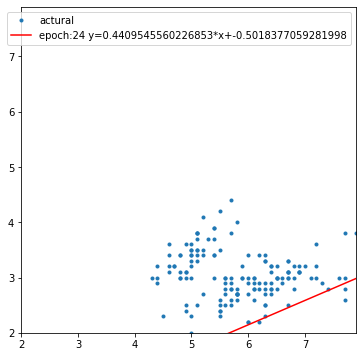

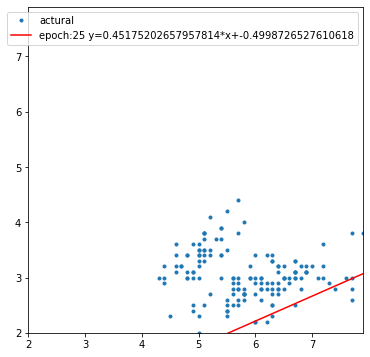

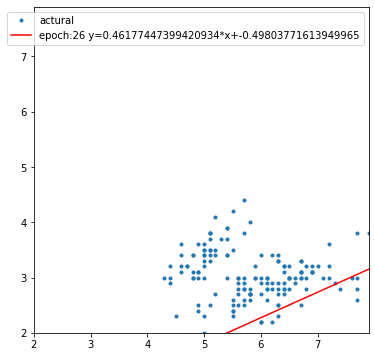

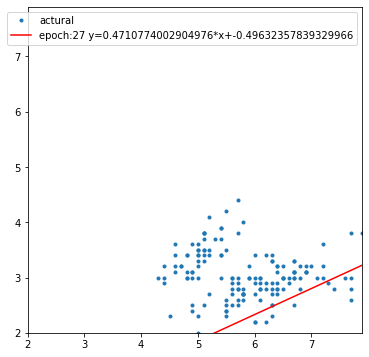

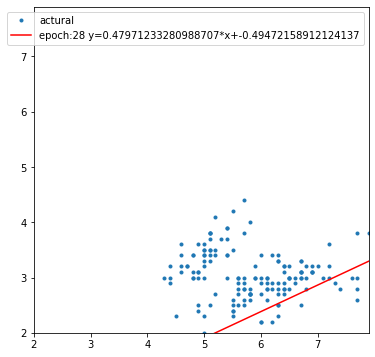

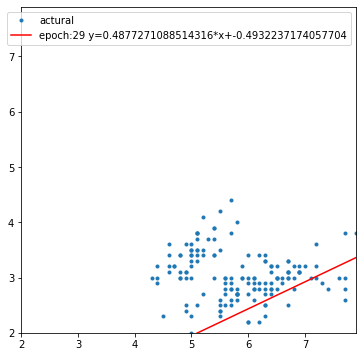

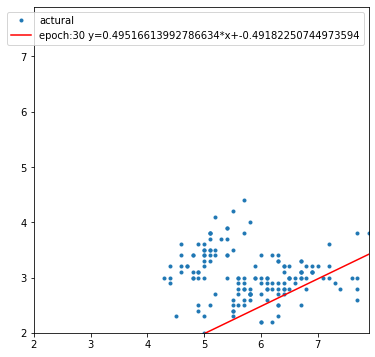

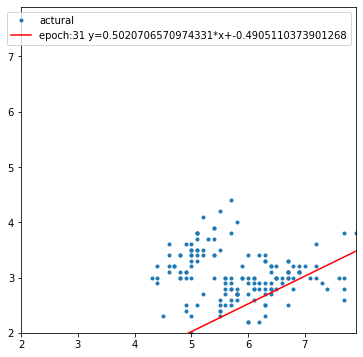

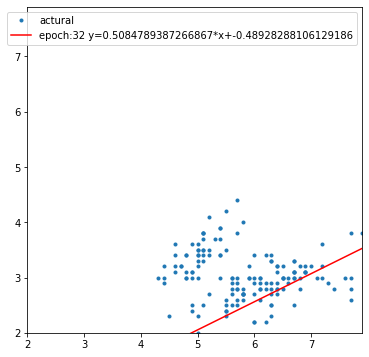

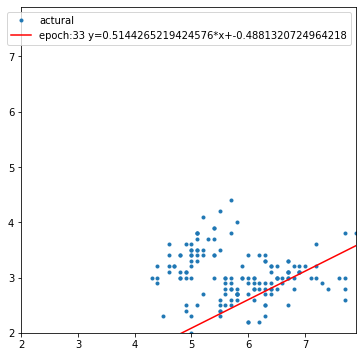

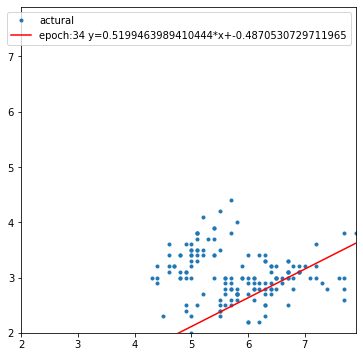

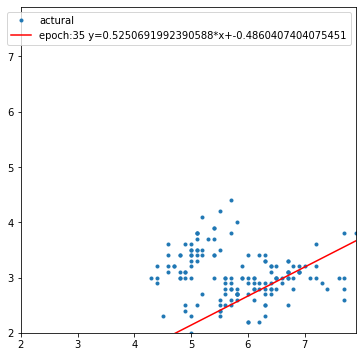

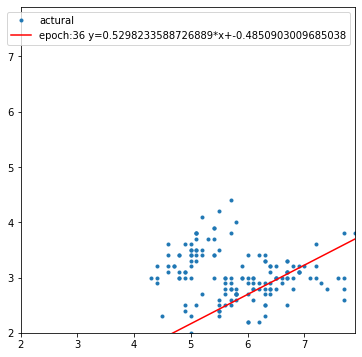

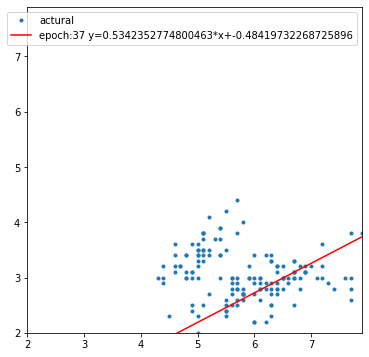

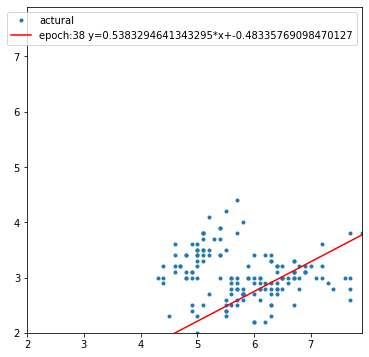

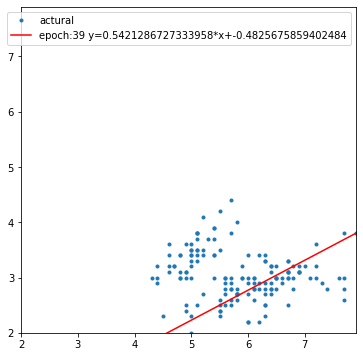

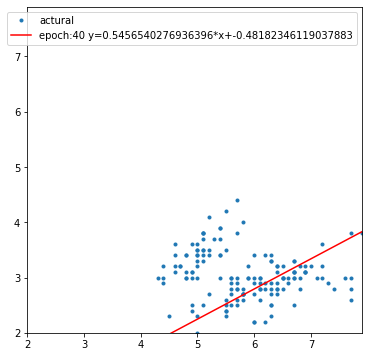

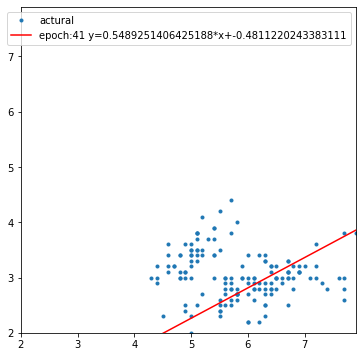

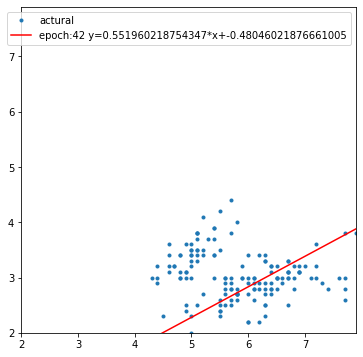

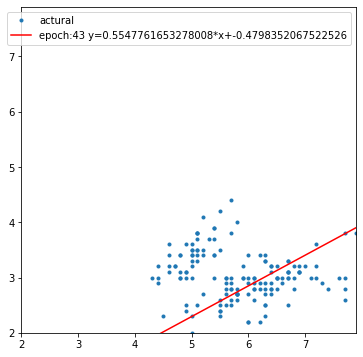

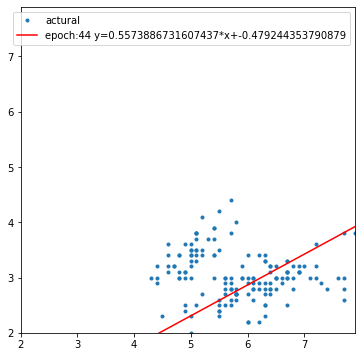

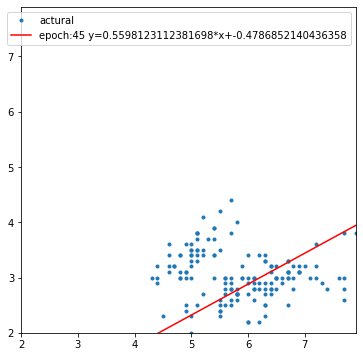

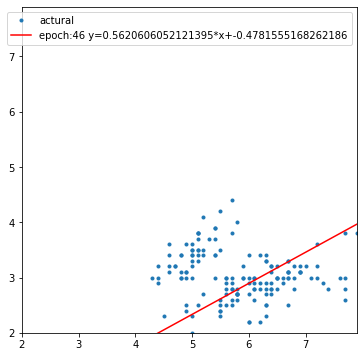

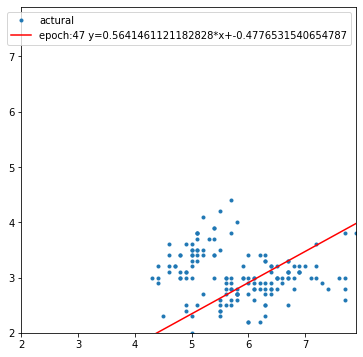

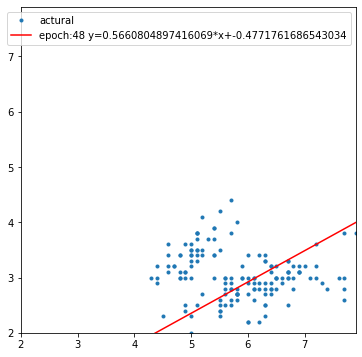

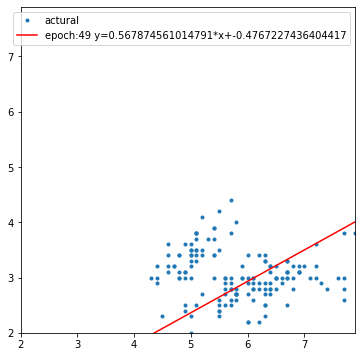

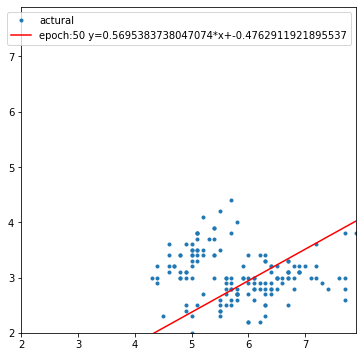

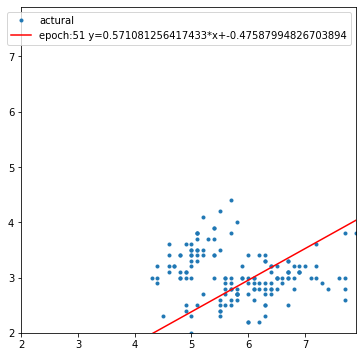

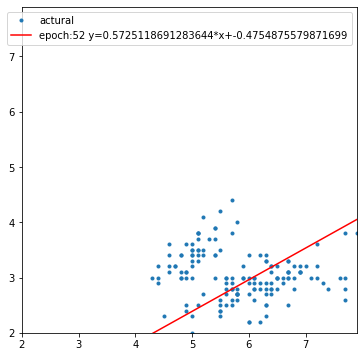

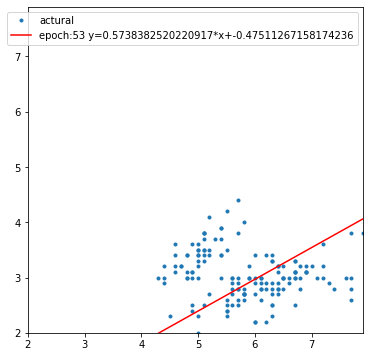

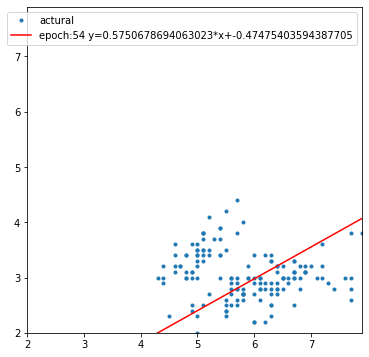

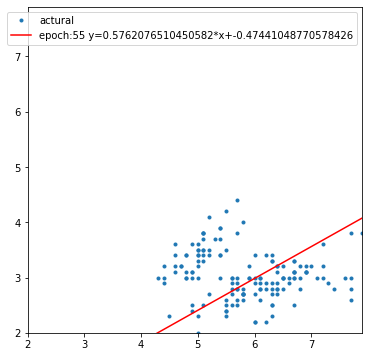

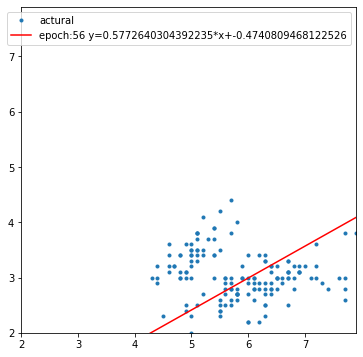

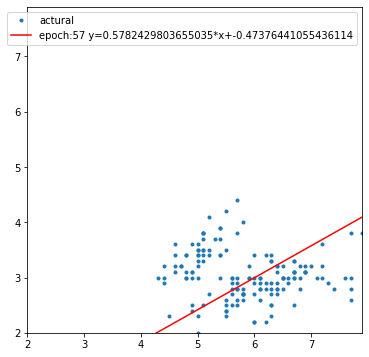

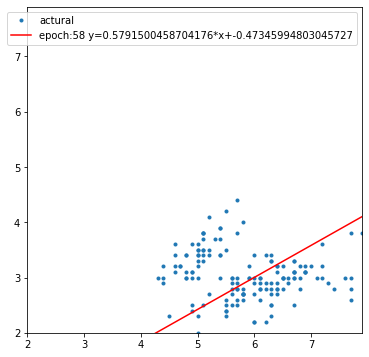

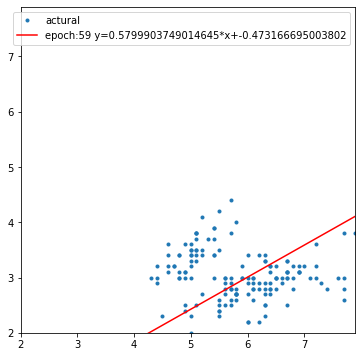

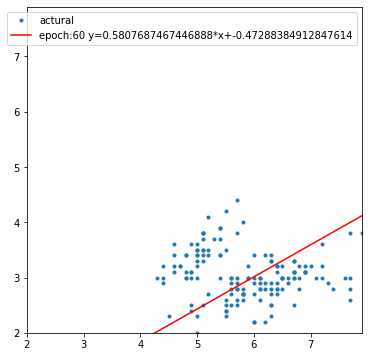

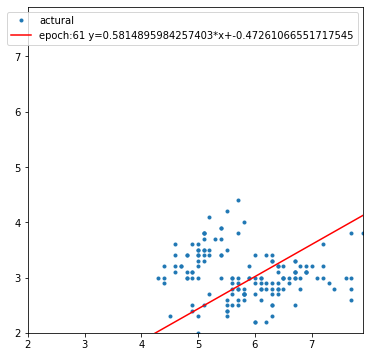

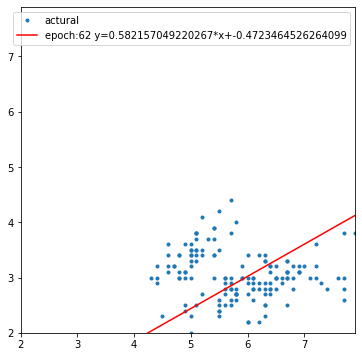

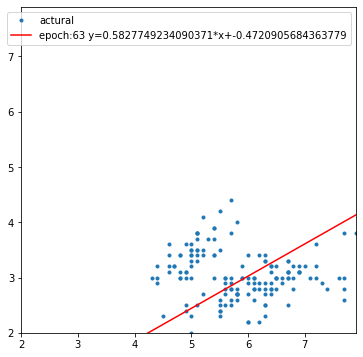

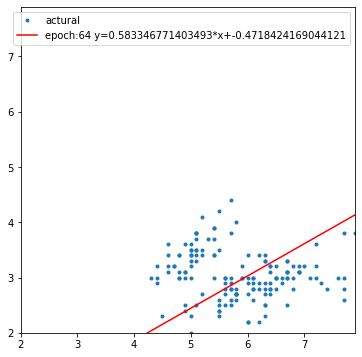

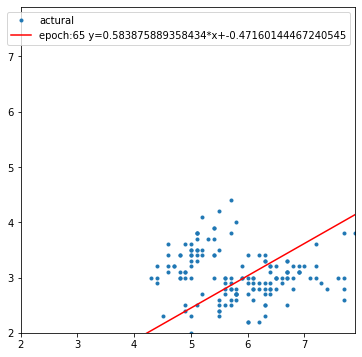

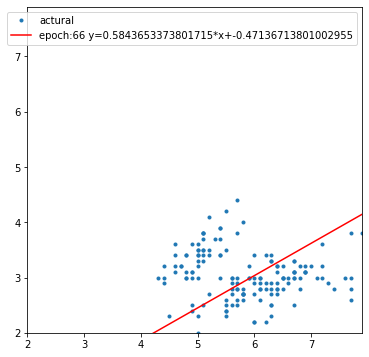

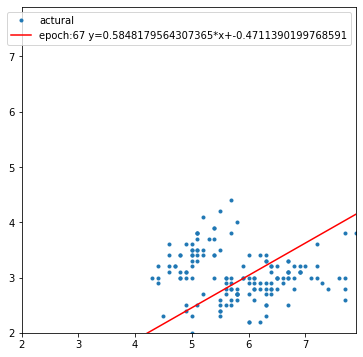

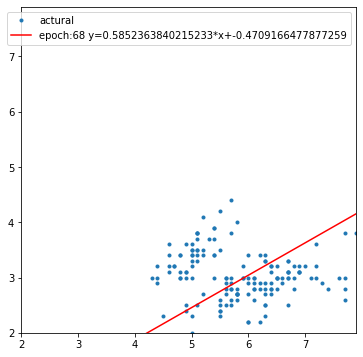

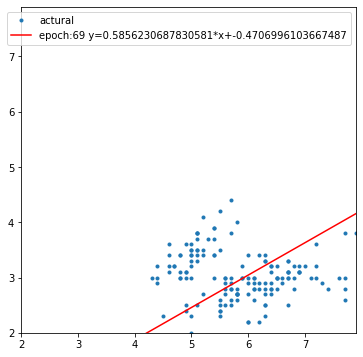

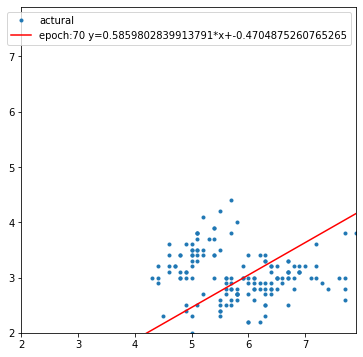

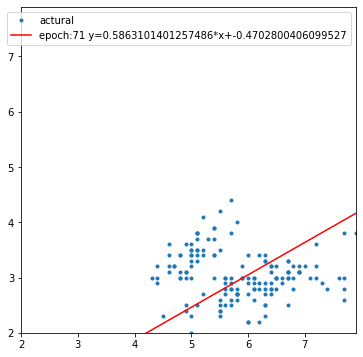

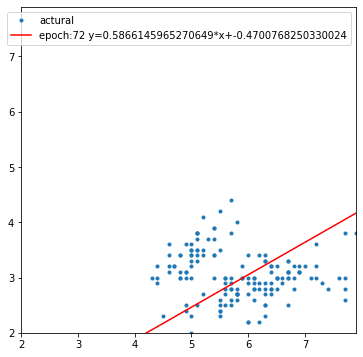

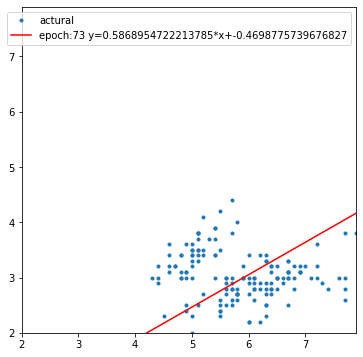

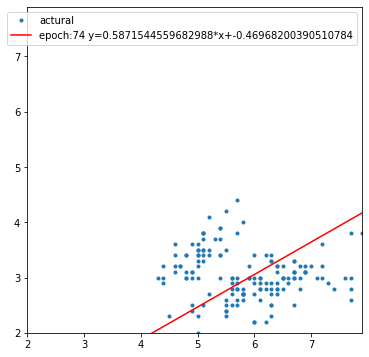

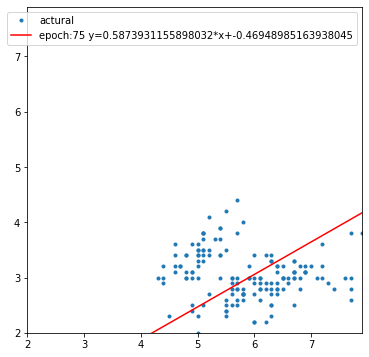

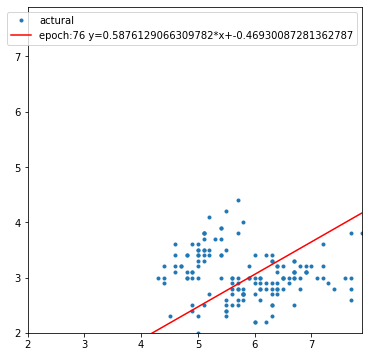

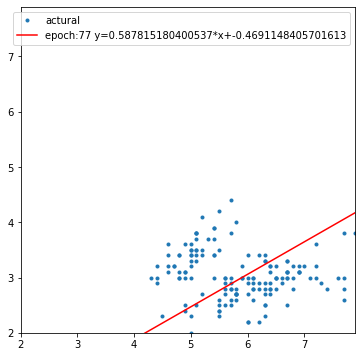

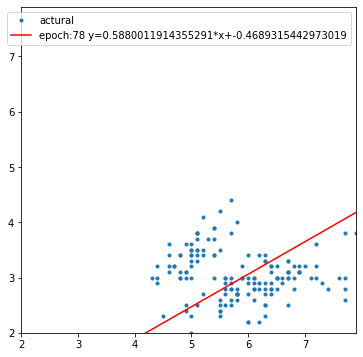

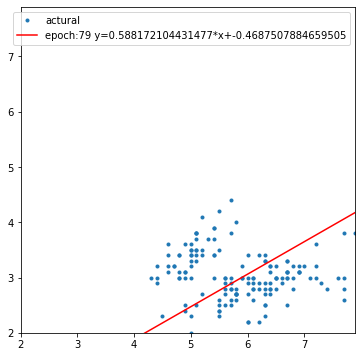

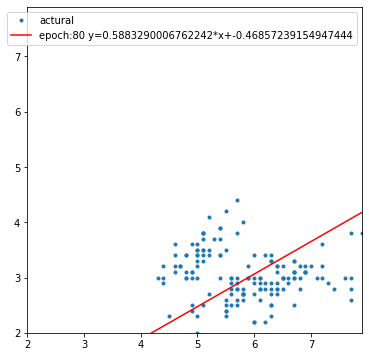

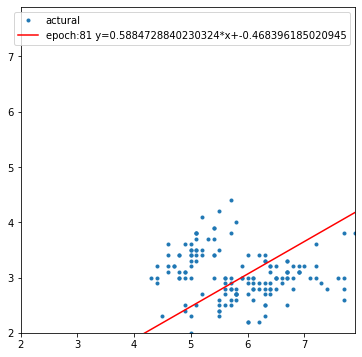

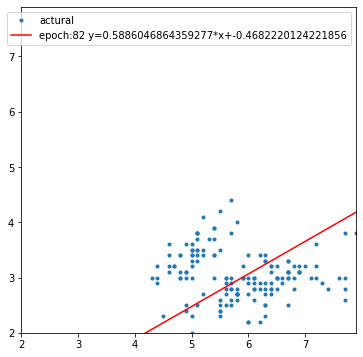

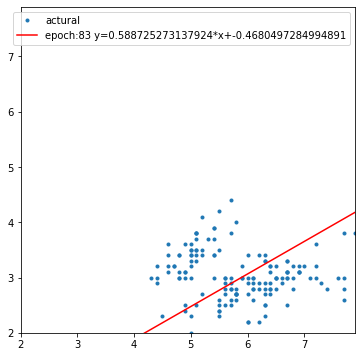

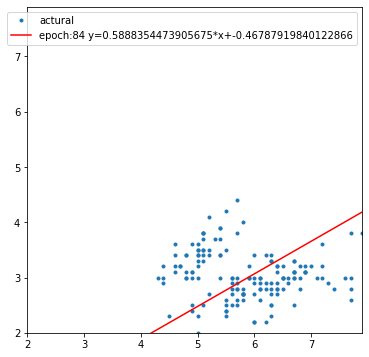

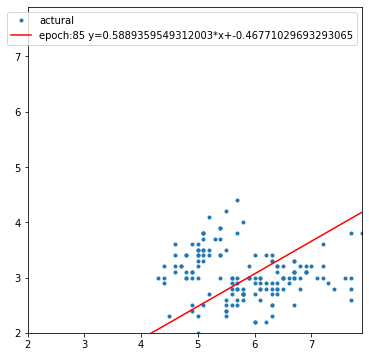

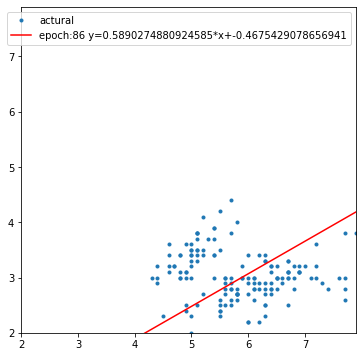

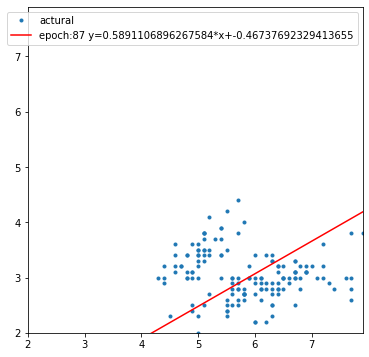

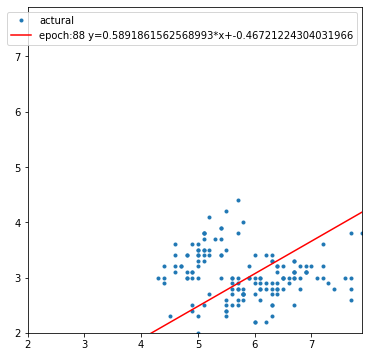

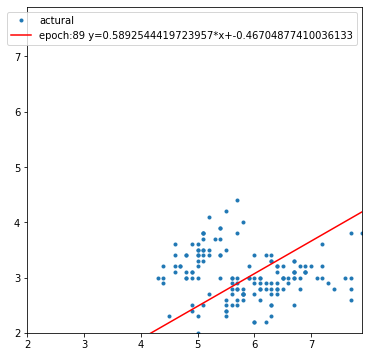

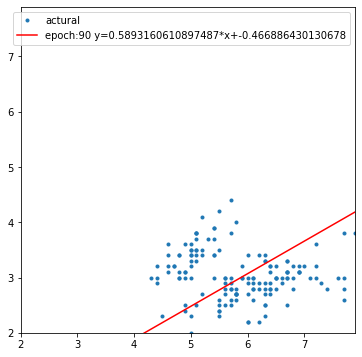

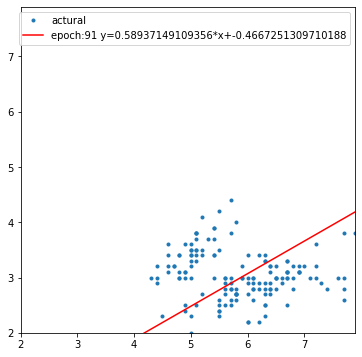

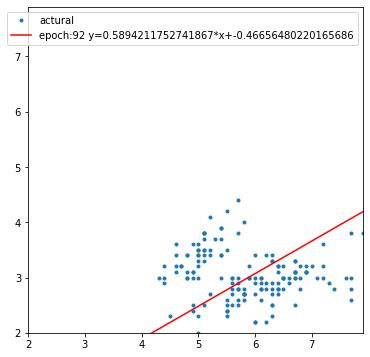

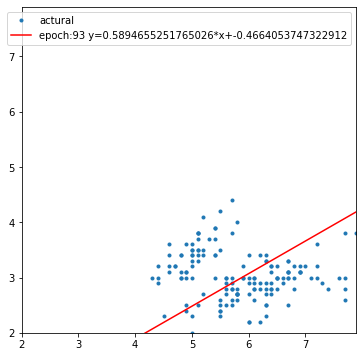

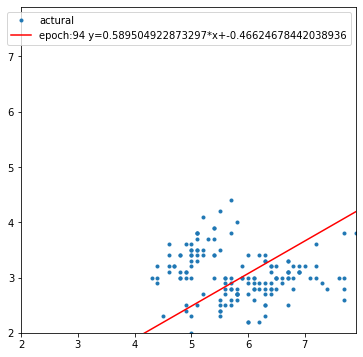

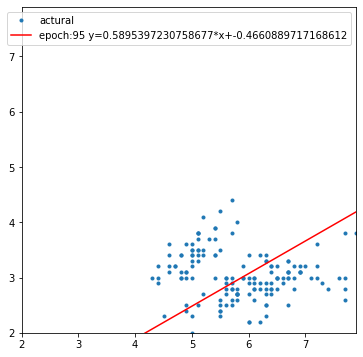

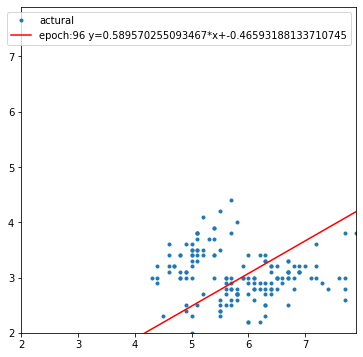

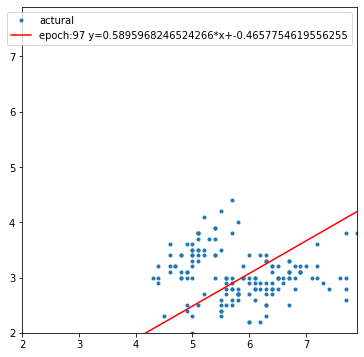

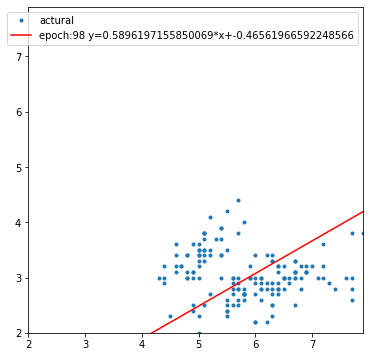

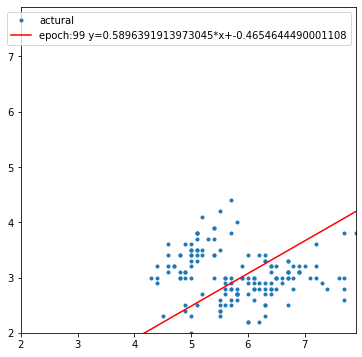

In [51]:
min_val = min(min(xs2), min(ys2))
max_val = max(max(xs2), min(ys2))
for epoch,wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]

  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs2,ys2,'.',label = 'actural')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color = 'black')
  plt.axhline(y=0,color = 'black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()